In [46]:
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [23]:
end=datetime.now()
start=datetime(end.year-1,end.month-1,1)

In [25]:
data=wb.DataReader('GOOG','yahoo',start,end)['Adj Close']

In [27]:
pct=data.pct_change()

In [41]:
day=365
dt=1/365
mean=pct.mean()
dev=pct.std()
def montecarlo(startp,days,mean,dev):
    price=np.zeros(days)
    price[0]=startp
    shock=np.zeros(days)
    drift=np.zeros(days)
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mean*dt,scale=dev*np.sqrt(dt))
        drift[x]=mean*dt
        price[x]=price[x-1]+(price[x-1]*(shock[x]+drift[x]))
    return price

In [29]:
data.head()

Date
2018-04-30    1017.330017
2018-05-01    1037.310059
2018-05-02    1024.380005
2018-05-03    1023.719971
2018-05-04    1048.209961
Name: Adj Close, dtype: float64

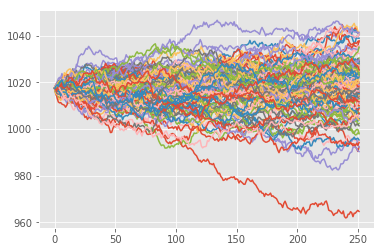

In [54]:
startp=1017.330017

for r in range(100):
    plt.Figure(figsize=(20,20))
    plt.plot(montecarlo(startp,days,mean,dev))
